In [1]:
import tensorflow as tf
from tensorflow import keras

import os
import tempfile

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
mpl.rcParams['figure.figsize']  = (12,10)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [3]:
file = tf.keras.utils
raw_df = pd.read_csv('https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv')
raw_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
raw_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
neg, pos = np.bincount(raw_df['Class'])
total = neg+ pos
print (f"Total examples: {total}, Positive: {pos}, which is {100 * pos / total}% of total")

Total examples: 284807, Positive: 492, which is 0.1727485630620034% of total


In [6]:
cleaned_df = raw_df.copy()

# Drop the time column
cleaned_df.pop('Time')

# Convert the amount column to log space
eps = 0.001
cleaned_df['Log Amount'] = np.log(cleaned_df.pop('Amount')+eps)

In [7]:
# Use the sklearn utility to split into train, test and validation
# The parameter "test_size" simpl yrefers to how big the second set is

train_df, test_df = train_test_split(cleaned_df, test_size = 0.2)
train_df, val_df = train_test_split(train_df, test_size = 0.2)

# Form np arrays of labels and features
# This line does two things:
# 1. 'Pop's the 'Class' column from the train_df
# 2. Assigns the now popped column into a labels dataframe
train_labels = np.array(train_df.pop('Class'))

bool_train_labels = train_labels != 0
val_labels = np.array(val_df.pop('Class'))
test_labels = np.array(test_df.pop('Class'))

train_features = np.array(train_df)
val_features = np.array(val_df)
test_features = np.array(test_df)

In [8]:
# Normalize input features using StandardScaler
# Note that it is important to do this now, after the split
# to avoid the spillover of test and validation data into the training set

# Also, we only fit the scaler to the train values!!!

scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)

val_features = scaler.transform(val_features)
test_features = scaler.transform(test_features)
                                 
train_features = np.clip(train_features, -5, 5)
val_features = np.clip(val_features, -5, 5)
test_features = np.clip(test_features, -5, 5)

print(f"Training labels shape: {train_labels.shape}")
print(f"Validations labels shape: {val_labels.shape}")
print(f"Test labels shape: {test_labels.shape}")

print(f"Training features shape: {train_features.shape}")
print(f"Validation features shape: {val_features.shape}")
print(f"Test features shape: {test_features.shape}")



Training labels shape: (182276,)
Validations labels shape: (45569,)
Test labels shape: (56962,)
Training features shape: (182276, 29)
Validation features shape: (45569, 29)
Test features shape: (56962, 29)


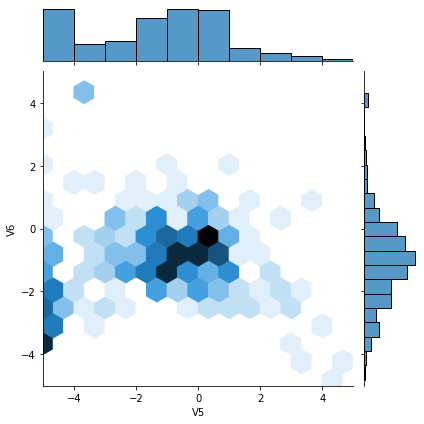

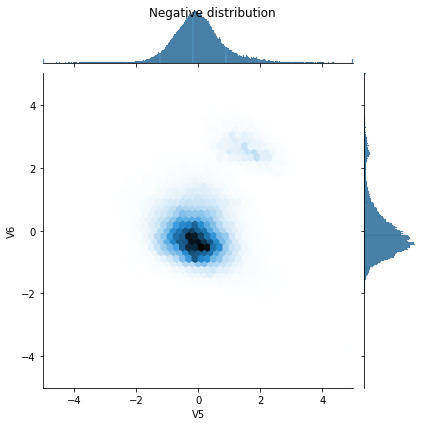

In [9]:
pos_df = pd.DataFrame(train_features[ bool_train_labels], columns = train_df.columns)
neg_df = pd.DataFrame(train_features[~bool_train_labels], columns = train_df.columns)

sns.jointplot(x=pos_df['V5'], y=pos_df['V6'], kind='hex', xlim=(-5,5), ylim=(-5,5))

sns.jointplot(x=neg_df['V5'], y=neg_df['V6'], kind = 'hex', xlim=(-5,5), ylim=(-5,5))

_ = plt.suptitle("Negative distribution")

In [10]:
METRICS = [
           keras.metrics.TruePositives(name='tp'),
           keras.metrics.FalsePositives(name='fp'),
           keras.metrics.TrueNegatives(name='tn'),
           keras.metrics.FalseNegatives(name='fn'),
           keras.metrics.BinaryAccuracy(name='accuracy'),
           keras.metrics.Precision(name='precision'),
           keras.metrics.Recall(name='recall'),
           keras.metrics.AUC(name='auc'),
           keras.metrics.AUC(name='prc', curve='PR'), # Precision-recall curve
]

def make_model(metrics=METRICS, output_bias=None):
  if output_bias is not None:
    output_bias = tf.keras.initializers.Constant(output_bias)
  
  model = keras.Sequential([
      keras.layers.Dense(16, activation='relu', input_shape = (train_features.shape[-1],)),
      keras.layers.Dropout(0.5),
      keras.layers.Dense(1, activation='sigmoid', bias_initializer=output_bias),
  ])

  model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-3),
                loss=keras.losses.BinaryCrossentropy(),
                metrics=metrics)
  
  return model

In [11]:
EPOCHS = 100
BATCH_SIZE = 2048

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor = 'val_prc',
    verbose = 1,
     patience = 10,
     mode = 'max',
     restore_best_weights = True
)

In [12]:
model = make_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                480       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 497
Trainable params: 497
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.predict(train_features[:10])

array([[0.7476893 ],
       [0.7047777 ],
       [0.31301194],
       [0.6477743 ],
       [0.46679318],
       [0.96029514],
       [0.99767035],
       [0.96880853],
       [0.9123734 ],
       [0.9357954 ]], dtype=float32)

In [14]:
# Set the correct initial bias = log(pos/neg)

results = model.evaluate(train_features, train_labels, batch_size=BATCH_SIZE, verbose=0)
print(f"Loss: {results[0]}")

Loss: 1.4380335807800293


In [15]:
initial_bias = np.log([pos/neg])
initial_bias

array([-6.35935934])

In [16]:
model = make_model(output_bias = initial_bias)
model.predict(train_features[:10])

array([[0.00109458],
       [0.00395191],
       [0.00164452],
       [0.00112128],
       [0.00275716],
       [0.00116146],
       [0.01849735],
       [0.00302169],
       [0.01861531],
       [0.00223324]], dtype=float32)

In [17]:
results = model.evaluate(train_features, train_labels, batch_size=BATCH_SIZE, verbose=0)
print(f"Loss: {results[0]}")

Loss: 0.015539461746811867


In [18]:
# Chekpoint the initial weights

initial_weights = os.path.join(tempfile.mkdtemp(), 'initial_weights')
model.save_weights(initial_weights)

In [19]:
model = make_model()
model.load_weights(initial_weights)
model.layers[-1].bias.assign([0.0])

zero_bias_history = model.fit(
                        train_features, 
                        train_labels,
                        batch_size = BATCH_SIZE,
                        epochs = 20,
                        validation_data = (val_features, val_labels),
                        verbose = 0)

In [20]:
model = make_model()
model.load_weights(initial_weights)

careful_bias_history = model.fit(
                        train_features,
                        train_labels,
                        batch_size = BATCH_SIZE,
                        epochs = 20,
                        validation_data = (val_features, val_labels),
                        verbose = 0
                        )

In [23]:
def plot_loss(history, label, n):
  #Use a log scale on y-axis to show the wide range of values.
  plt.semilogy(history.epoch, history.history['loss'],
               color=colors[n], label = 'Train' + label)
  
  plt.semilogy(history.epoch, history.history['val_loss'],
               color=colors[n], label = 'Validation loss' + label,
               linestyle = '--')
  
  plt.xlabel('Epoch')
  plt.ylabel('loss')

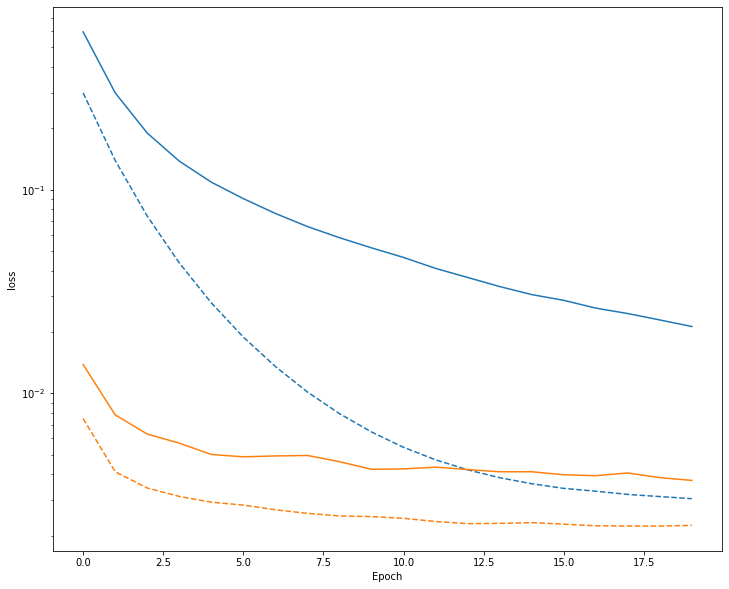

In [24]:
plot_loss(zero_bias_history, "Zero Bias", 0)
plot_loss(careful_bias_history, "Careful Bias", 1)

In [25]:
model = make_model()
model.load_weights(initial_weights)
baseline_history = model.fit(
    train_features,
    train_labels,
    batch_size = BATCH_SIZE,
    epochs = EPOCHS,
    callbacks = [early_stopping],
    validation_data = (val_features, val_labels)
)

Epoch 1/100
90/90 [==============================] - 6s 28ms/step - loss: 0.0137 - tp: 68.0000 - fp: 114.0000 - tn: 227343.0000 - fn: 320.0000 - accuracy: 0.9981 - precision: 0.3736 - recall: 0.1753 - auc: 0.7301 - prc: 0.1581 - val_loss: 0.0077 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 45493.0000 - val_fn: 76.0000 - val_accuracy: 0.9983 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.9321 - val_prc: 0.4825
Epoch 2/100
90/90 [==============================] - 1s 9ms/step - loss: 0.0079 - tp: 63.0000 - fp: 30.0000 - tn: 181934.0000 - fn: 249.0000 - accuracy: 0.9985 - precision: 0.6774 - recall: 0.2019 - auc: 0.8710 - prc: 0.3330 - val_loss: 0.0043 - val_tp: 22.0000 - val_fp: 6.0000 - val_tn: 45487.0000 - val_fn: 54.0000 - val_accuracy: 0.9987 - val_precision: 0.7857 - val_recall: 0.2895 - val_auc: 0.9600 - val_prc: 0.7439
Epoch 3/100
90/90 [==============================] - 1s 13ms/step - loss: 0.0061 - tp: 123.0000 - fp: 23.0000 - tn: 181941.0000 - fn: 189.0

In [30]:
def plot_metrics(history):
  metrics = ['loss', 'prc', 'precision', 'recall']

  for n, metric in enumerate(metrics):
    name = metric.replace("_", " ").capitalize()
    
    plt.subplot(2,2, n+1)
    plt.plot(history.epoch, history.history[metric], color = colors[0], label = 'Train')
    plt.plot(history.epoch, history.history['val_' + metric],
             color = colors[0], linestyle = "--", label = 'Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    
    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    elif metric =='auc':
      plt.ylim([0.8,1])
    else:
      plt.ylim([0,1])
      
    plt.legend();



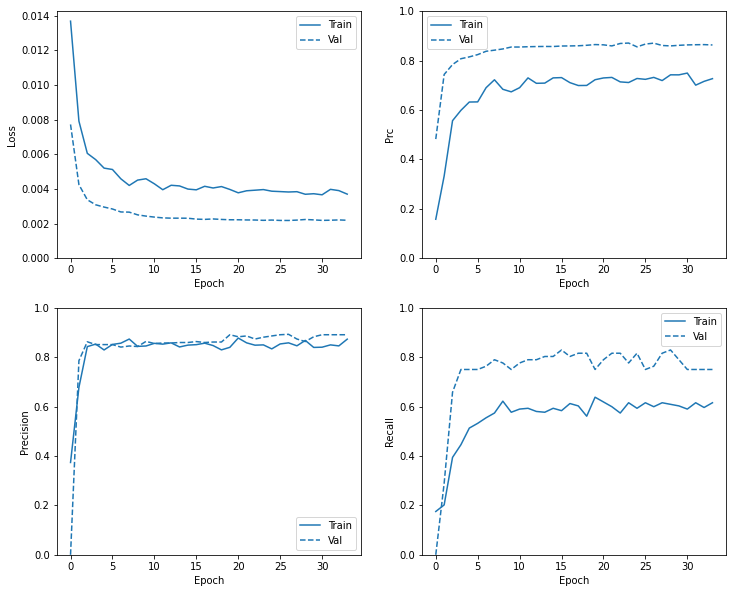

In [31]:
plot_metrics(baseline_history)